In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [ ]:
y_train = y_train.reshape(-1,)

In [ ]:
y_train.shape

(50000,)

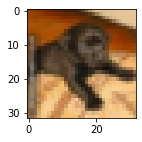

In [ ]:
plt.figure(figsize = (15,2))
plt.imshow(X_train[56])

In [ ]:
y_train[56]

5

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
classes[y_train[56]]

'dog'

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255



##Normalize the data

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

## Build simple artificial neural network for image classification


In [ ]:
ann=models.Sequential([
                   layers.Flatten(input_shape=(32,32,3)),
                   layers.Dense(3000,activation='relu'),
                   layers.Dense(1000,activation='relu'),
                   layers.Dense(10,activation='softmax')
])

In [ ]:
ann.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
            )
ann.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 4ms/step - loss: 1.8726 - accuracy: 0.3292
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6556 - accuracy: 0.4075
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5825 - accuracy: 0.4356
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5300 - accuracy: 0.4513
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4937 - accuracy: 0.4670
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4641 - accuracy: 0.4764
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4452 - accuracy: 0.4822
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4208 - accuracy: 0.4923
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3961 - accuracy: 0.5008
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.379

In [ ]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 3000)              9219000   
                                                                 
 dense_1 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


## By default the batch size is 32

In [ ]:
50000/32

1562.5

## Testing

In [ ]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4696 - accuracy: 0.4851


[1.4696226119995117, 0.48510000109672546]

In [ ]:
y_pred = ann.predict(X_test)
y_pred

array([[3.0457592e-02, 1.3856035e-02, 6.4747013e-02, ..., 4.6819476e-03,
        4.7184661e-02, 6.6652815e-03],
       [5.8385331e-02, 2.6215622e-01, 9.6762984e-04, ..., 1.6017762e-04,
        4.8525274e-01, 1.9143991e-01],
       [1.2057751e-01, 2.0272781e-01, 7.8844419e-04, ..., 2.7535460e-03,
        5.9507996e-01, 7.5075030e-02],
       ...,
       [2.0299086e-03, 4.1896584e-03, 3.9330829e-02, ..., 5.2951600e-02,
        2.7782895e-02, 3.1410379e-03],
       [4.4513978e-02, 1.5682852e-02, 1.7505261e-01, ..., 3.6516413e-02,
        4.5422921e-03, 1.0501477e-02],
       [1.8452683e-02, 1.1317374e-03, 9.3886338e-02, ..., 6.4944649e-01,
        4.6221870e-03, 1.5389456e-03]], dtype=float32)

In [ ]:
np.argmax(y_pred[6])

3

In [ ]:
classes[np.argmax(y_pred[6])]

'cat'

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes[y_test[6]]

'automobile'

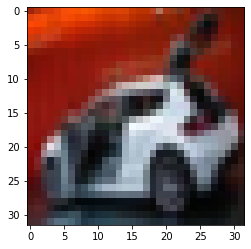

In [ ]:
plt.imshow(X_test[6])

## Now lets build the CNN model on the same training data sets

In [ ]:
cnn = models.Sequential([
      layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
      layers.MaxPool2D((2,2)),

      layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
      layers.MaxPool2D((2,2)),

      layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
      layers.MaxPool2D((2,2)),

      layers.Flatten(),
      layers.Dense(64,activation='relu'),
      layers.Dense(10,activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5528 - accuracy: 0.4323
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1605 - accuracy: 0.5891
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9933 - accuracy: 0.6519
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8828 - accuracy: 0.6910
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8056 - accuracy: 0.7202
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7447 - accuracy: 0.7400
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6893 - accuracy: 0.7591
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6447 - accuracy: 0.7735
Epoch 9/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5996 - accuracy: 0.7884
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.561

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9615 - accuracy: 0.6926


[0.9614813327789307, 0.6926000118255615]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.0094226e-03, 4.4535773e-04, 2.9865393e-04, 4.3956766e-01,
        3.5617933e-05, 5.4096192e-01, 4.3767253e-03, 1.4718126e-04,
        2.6741836e-03, 1.0483338e-02],
       [1.3631012e-03, 4.2055059e-02, 2.7317441e-07, 1.2555457e-06,
        1.4247175e-07, 2.0136538e-08, 1.0367443e-07, 1.1595559e-07,
        9.5638222e-01, 1.9770884e-04],
       [2.2260223e-02, 8.8800620e-03, 3.1620031e-03, 3.5839960e-02,
        7.4021908e-04, 3.6158906e-03, 1.7159279e-03, 3.9155157e-03,
        8.7200952e-01, 4.7860656e-02],
       [7.7482991e-02, 6.4140721e-04, 2.1101953e-03, 3.1298634e-03,
        8.5764797e-03, 9.1601483e-05, 1.7654442e-04, 9.7819093e-06,
        9.0757424e-01, 2.0684313e-04],
       [5.3469535e-07, 9.3744814e-07, 4.1744430e-02, 1.2947184e-02,
        3.7334397e-01, 3.6479058e-04, 5.7158953e-01, 7.7650766e-06,
        3.9725708e-07, 4.3913724e-07]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[5, 8, 8, 8, 6]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)